# Ordini di grandezza
Gli esempi che abbiamo visto per il calcolo del numero di Fibonacci ci mostrano che possiamo avere dei processi di calcolo in cui la velocità con cui vengono consumate le risorse di calcolo varia notevolmente. Un modo conveniente per descrivere queste differenze è di utilizzare gli **ordini di grandezza** per ottenere una misura approssimata delle risorse richieste da un processo quando l'input continua a diventare più grande.

Sia $n$ un parametro che misura la dimensione di un problema, e sia $R(n)$ la quantità di risorsa che il processo richiede per un problema di dimensione $n$. 

$R(n)$ potrebbe essere il numero di registri di memoria che devono essere utilizzati, oppure il numero di operazioni elementari che devono essere eseguite. I computer attuali eseguono solo un numero finito di operazioni alla volta e il tempo totale richiesto sarà proporzionale al numero di istruzioni elementari da eseguire.

Diciamo che $R(n)$ ha un ordine di crescita $\Theta(f(n))$, scritto $R(n)=\Theta(f(n))$ se esistono due costanti positive $k_1$ e $k_2$ indipendenti da $n$ tali che

$$k_1 f(n) \leq R(n) \leq k_2 f(n)$$

per valori sufficientemente grandi di $n$.

Per esempio, con i processi lineari ricorsivi per calcolare il fattoriale di $n$ descritto nel **Lab 4**, il numero di passi necessari cresce linearmente con l'input $n$. Quindi, i passi richiesti dal processo cresce come $\Theta(n)$. Abbiamo visto che anche lo spazio cresce come $\Theta(n)$.

Per il calcolo del fattoriale calcolato con un processo iterativo, il numero di passi è ancora $\Theta(n)$, ma lo spazio richiesto è $\Theta(1)$, ovvero è costante.

Il calcolo dell'ennesimo numero della sequenza di Fibonacci richiede $\Theta(1.61^n)$ passi e $\Theta(n)$ spazio di memoria (NOTA: è possibile dimostrare come ottenere 1.61).

Gli ordini di grandezza danno solo una descrizione di massima del comportamento di un processo di calcolo. Per esempio, un processo che richiede $n^2$ passi, un processo che richiede $1000n^2$ passi, e uno che richiede $3n^2 + 10n + 17$ passi hanno tutti un ordine di grandezza di $\Theta(n^2)$. Tuttavia, anche se approssimata, l'informazione risulta essere molto utile.

Se per esempio consideriamo un processo che è $\Theta(n)$, raddoppiando la dimensione dell'input, ci aspettiamo che il processo raddoppi il consumo di risorse di calcolo. Invece, per un processo esponenziale, ad ogni incremento unitario della dimensione dell'input, ci aspettiamo che il consumo di risorse sia moltiplicato per un fattore costante.

**ESERCIZIO 6.1**: Si consideri il problema di calcolare l'esponenziale di un numero dato. Vorremo scrivere una procedura che prende in input una base $b$ e un esponente intero positivo $n$, e restituisce in output il valore $b^n$. Un modo per definire questa operazione è:

$$
\begin{align}
b^0 &= 1 \\
b^n &= b \cdot b^{n-1}
\end{align}
$$

Scrivere la procedura che implementa questa definizione.

In [ ]:
def Exp(b,n):
    if n == 0:
        return 1
    else:
        return b*Exp(b, n-1)
    
Exp(2,5)

La procedura appena scritta, quante operazioni elementari richiede? Che ordine di grandezza? E in termini di spazio di memoria?

**ESERCIZIO 6.2**: Modificare la procedura precedente in modo tale che restituisca il numero di chiamate ricorsive necessarie per effettuare il calcolo richiesto. Tracciare un grafico che mostra la crescita del numero di passi richiesta in funzione di $n$.

In [1]:
def ExpGrowth(b,n):
    def ExpCount(b, n, counter):
        if n == 0:
            return 1, counter
        else:
            c, d = ExpCount(b, n-1, counter+1)
            return b*c, d
    e, count = ExpCount(b,n,1)
    return count

ExpGrowth(2,100)

101

In [2]:
from numpy import linspace
D = linspace(1,100,100)
Y = [ExpGrowth(2, n) for n in D]

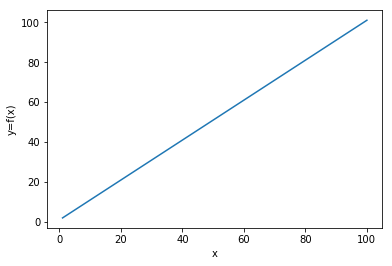

In [3]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
plot(D,Y)
xlabel("x")
ylabel("y=f(x)")
show()

**ESERCIZIO 6.3:** È possibile calcolare gli esponenziali in un numero inferiore di passi, usando i quadrati successivi. Per esempio, invece di calcolare $b^8$ come:

```
b*(b*(b*(b*(b*(b*(b*b)))))))
```

possiamo calcolarlo usando solo tre moltiplicazioni:

```
b^2 = b*b
b^4 = b^2*b^2
b^8 = b^4*b^4
```

Questo metodo funziona bene con gli esponenti che sono potenze di 2. Possiamo usare la stessa idea nel calcolare gli esponenziali in generale se consideriamo che in generale vale la regola:

$$
\begin{align}
    b^n =(b^{n/2})^2 && \mbox{se $n$ è pari} \\
    b^n = b \cdot b^{n-1} && \mbox{se $n$ è dispari}
\end{align}
$$

Si scriva una proceduta che utilizza quest'idea.

In [ ]:
def FastExp(b, n):
    if n == 0:
        return 1
    if n % 2 == 0:
        return FastExp(b, n/2)**2
    return b*FastExp(b, n-1)

FastExp(2,100)

**ESERCIZIO 6.4:** Modificare la procedura precedente in modo tale che restituisca il numero di chiamate ricorsive necessarie per effettuare il calcolo richiesto. Tracciare un grafico che mostra la crescita del numero di passi richiesta in funzione di $n$.

In [5]:
def FastExpGrowth(b, n):
    def FastExpCount(b, n, counter):
        if n == 0:
            return 1, counter
        if n % 2 == 0:
            c, d = FastExpCount(b, n/2, counter+1)
            return c**2, d
        c, d = FastExpCount(b, n-1, counter+1)
        return b*c, d
    c, d = FastExpCount(b, n, 1) 
    return d

FastExpGrowth(2,100)

10

In [6]:
from numpy import linspace
D = linspace(1,100,100)
Y = [FastExpGrowth(2, n) for n in D]

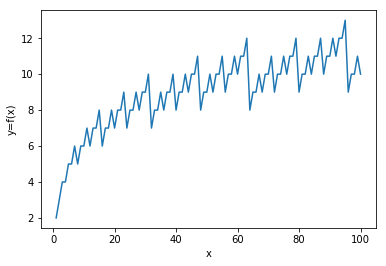

In [7]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
plot(D,Y)
xlabel("x")
ylabel("y=f(x)")
show()